In [1]:
import torch
from data import ClimateDataset
from models import ClassificationModel
from engine import Engine

In [2]:
model_checkpoint='microsoft/deberta-base'

In [3]:
results = {'acc':[],
           'f1':[],
           'a':[]}

In [4]:
r = 8
lora_alpha = [4,8,16,32]
lora_dropout = 0.0
lr = 1.0e-5
wd = 0.0

for a in lora_alpha:
    print(f'Grid search {model_checkpoint}, lr: {lr}. Weight decay {wd}. Lora rank: {r}. Lora alpha: {a}')
    data = ClimateDataset(model_to_train=1,model_checkpoint=model_checkpoint,batch_size=32)
    data.setup_dataloaders()
    model = ClassificationModel(model_checkpoint=data.model_checkpoint,
                                num_labels=data.num_labels,
                                lora=True,
                                r=r,
                                alpha=a,
                                dropout=lora_dropout)
    trainer = Engine(epochs=10,labels=data.labels)
    trainer.model = model.model
    trainer.dataset_encoded = data.dataset_encoded
    acc, f1 = trainer.run(lr=lr,
                          wd=wd,
                          train_dataloader=data.train_dataloader,
                          eval_dataloader=data.eval_dataloader,
                          test_dataloader=data.test_dataloader,
                          early_stop=3)
    results['acc'].append(acc)
    results['f1'].append(f1)
    results['a'].append(a)
    print('### '*10)
    print(results)
    print('### '*10)
    with torch.no_grad():
        torch.cuda.empty_cache()
    del data, model, trainer, acc, f1

Grid search gpt2, lr: 0.0001. Focal loss gamma: 2. Weight decay 0.01. Lora rank: 4. Lora alpha: 4


Some weights of GPT2ForSequenceClassification were not initialized from the model checkpoint at gpt2 and are newly initialized: ['score.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.
/mnt/software/miniconda3/lib/python3.11/site-packages/peft/tuners/lora/model.py:301: UserWarning: fan_in_fan_out is set to False but the target module is `Conv1D`. Setting fan_in_fan_out to True.
  warnings.warn(
You're using a GPT2TokenizerFast tokenizer. Please note that with a fast tokenizer, using the `__call__` method is faster than using a method to encode the text followed by a call to the `pad` method to get a padded encoding.


1 / 10: Train Loss:	2.1999	Val Loss:	1.0195	Accuracy:	0.6236	F1:	0.4535
2 / 10: Train Loss:	0.9840	Val Loss:	0.7372	Accuracy:	0.6389	F1:	0.4917
3 / 10: Train Loss:	0.5777	Val Loss:	0.6873	Accuracy:	0.5908	F1:	0.4986
4 / 10: Train Loss:	0.4500	Val Loss:	0.6907	Accuracy:	0.5383	F1:	0.4963
5 / 10: Train Loss:	0.4074	Val Loss:	0.7176	Accuracy:	0.4836	F1:	0.4815
6 / 10: Train Loss:	0.3807	Val Loss:	0.7042	Accuracy:	0.4989	F1:	0.4950
No improvement for 3 epochs. Stopping early.
best (higgest macro f1-score) val results:
              precision    recall  f1-score   support

       bknow       0.32      0.79      0.45       119
      struct       0.84      0.40      0.54       338

    accuracy                           0.50       457
   macro avg       0.58      0.59      0.50       457
weighted avg       0.71      0.50      0.52       457

test results:
              precision    recall  f1-score   support

       bknow       0.28      0.78      0.41        67
      struct       0.79      0

Some weights of GPT2ForSequenceClassification were not initialized from the model checkpoint at gpt2 and are newly initialized: ['score.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.
/mnt/software/miniconda3/lib/python3.11/site-packages/peft/tuners/lora/model.py:301: UserWarning: fan_in_fan_out is set to False but the target module is `Conv1D`. Setting fan_in_fan_out to True.
  warnings.warn(
You're using a GPT2TokenizerFast tokenizer. Please note that with a fast tokenizer, using the `__call__` method is faster than using a method to encode the text followed by a call to the `pad` method to get a padded encoding.


1 / 10: Train Loss:	2.0997	Val Loss:	0.9728	Accuracy:	0.6171	F1:	0.4608
2 / 10: Train Loss:	0.8629	Val Loss:	0.7163	Accuracy:	0.6083	F1:	0.5035
3 / 10: Train Loss:	0.5026	Val Loss:	0.7098	Accuracy:	0.5405	F1:	0.4993
4 / 10: Train Loss:	0.4139	Val Loss:	0.7054	Accuracy:	0.5142	F1:	0.4942
5 / 10: Train Loss:	0.3896	Val Loss:	0.7153	Accuracy:	0.4705	F1:	0.4670
No improvement for 3 epochs. Stopping early.
best (higgest macro f1-score) val results:
              precision    recall  f1-score   support

       bknow       0.30      0.75      0.42       119
      struct       0.81      0.37      0.51       338

    accuracy                           0.47       457
   macro avg       0.55      0.56      0.47       457
weighted avg       0.67      0.47      0.49       457

test results:
              precision    recall  f1-score   support

       bknow       0.26      0.73      0.38        67
      struct       0.72      0.25      0.37       189

    accuracy                           0.38    

Some weights of GPT2ForSequenceClassification were not initialized from the model checkpoint at gpt2 and are newly initialized: ['score.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.
/mnt/software/miniconda3/lib/python3.11/site-packages/peft/tuners/lora/model.py:301: UserWarning: fan_in_fan_out is set to False but the target module is `Conv1D`. Setting fan_in_fan_out to True.
  warnings.warn(
You're using a GPT2TokenizerFast tokenizer. Please note that with a fast tokenizer, using the `__call__` method is faster than using a method to encode the text followed by a call to the `pad` method to get a padded encoding.


1 / 10: Train Loss:	1.9685	Val Loss:	0.9052	Accuracy:	0.5886	F1:	0.4772
2 / 10: Train Loss:	0.7354	Val Loss:	0.7181	Accuracy:	0.5711	F1:	0.4974
3 / 10: Train Loss:	0.4570	Val Loss:	0.7338	Accuracy:	0.4902	F1:	0.4786
4 / 10: Train Loss:	0.3943	Val Loss:	0.7238	Accuracy:	0.4661	F1:	0.4626
5 / 10: Train Loss:	0.3817	Val Loss:	0.7231	Accuracy:	0.4398	F1:	0.4396
No improvement for 3 epochs. Stopping early.
best (higgest macro f1-score) val results:
              precision    recall  f1-score   support

       bknow       0.29      0.81      0.43       119
      struct       0.82      0.31      0.45       338

    accuracy                           0.44       457
   macro avg       0.56      0.56      0.44       457
weighted avg       0.68      0.44      0.44       457

test results:
              precision    recall  f1-score   support

       bknow       0.26      0.79      0.39        67
      struct       0.74      0.21      0.32       189

    accuracy                           0.36    

Some weights of GPT2ForSequenceClassification were not initialized from the model checkpoint at gpt2 and are newly initialized: ['score.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.
/mnt/software/miniconda3/lib/python3.11/site-packages/peft/tuners/lora/model.py:301: UserWarning: fan_in_fan_out is set to False but the target module is `Conv1D`. Setting fan_in_fan_out to True.
  warnings.warn(
You're using a GPT2TokenizerFast tokenizer. Please note that with a fast tokenizer, using the `__call__` method is faster than using a method to encode the text followed by a call to the `pad` method to get a padded encoding.


1 / 10: Train Loss:	1.7312	Val Loss:	0.8325	Accuracy:	0.5602	F1:	0.4836
2 / 10: Train Loss:	0.5805	Val Loss:	0.7655	Accuracy:	0.4289	F1:	0.4182
3 / 10: Train Loss:	0.4186	Val Loss:	0.7644	Accuracy:	0.3982	F1:	0.3981
4 / 10: Train Loss:	0.3775	Val Loss:	0.7516	Accuracy:	0.3917	F1:	0.3899
No improvement for 3 epochs. Stopping early.
best (higgest macro f1-score) val results:
              precision    recall  f1-score   support

       bknow       0.28      0.86      0.42       119
      struct       0.82      0.23      0.36       338

    accuracy                           0.39       457
   macro avg       0.55      0.54      0.39       457
weighted avg       0.68      0.39      0.37       457

test results:
              precision    recall  f1-score   support

       bknow       0.27      0.88      0.41        67
      struct       0.78      0.15      0.25       189

    accuracy                           0.34       256
   macro avg       0.52      0.51      0.33       256
weighted av

In [8]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd


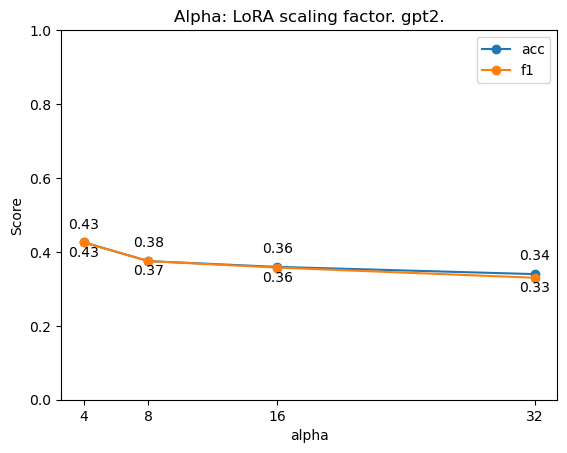

In [9]:
def plot_grid_search(df, title):

    # Create the plot
    ax = df.plot(x='a', y=['acc', 'f1'], marker='o', linestyle='-')

    # Set y-axis range between 0 and 1
    plt.ylim(0, 1)

    # Annotate points with F1 scores
    for i, row in df.iterrows(): 
        ax.annotate(f'{row["f1"]:.2f}', (row["a"], row["f1"]), textcoords='offset points', xytext=(0, -10), ha='center')

    # Annotate points with Acc scores
    for i, row in df.iterrows():
        ax.annotate(f'{row["acc"]:.2f}', (row["a"], row["acc"]), textcoords='offset points', xytext=(0, 10), ha='center')
    
    # 
    plt.xticks(df['a'], [val for val in df['a']], ha='center')
    # plt.xscale('log')
    plt.minorticks_off()

    plt.title(title)
    plt.xlabel('alpha')
    plt.ylabel('Score')
    plt.show()

plot_grid_search(pd.DataFrame(results), f'Alpha: LoRA scaling factor. {model_checkpoint}.')